# Linear Regression example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [2]:
dataset = pd.read_csv('./data/laptop_data_cleaned.csv')
features = ['Ppi', 'Ram', 'SSD', 'Weight']
X = dataset[features].values
y = dataset['Price'].values

print(X.shape, y.shape)
print(X[:5])
print(y[:5])

(1273, 4) (1273,)
[[226.98300468   8.         128.           1.37      ]
 [127.67794013   8.           0.           1.34      ]
 [141.21199808   8.         256.           1.86      ]
 [220.53462387  16.         512.           1.83      ]
 [226.98300468   8.         256.           1.37      ]]
[11.17575455 10.77677732 10.32993107 11.81447594 11.47310097]


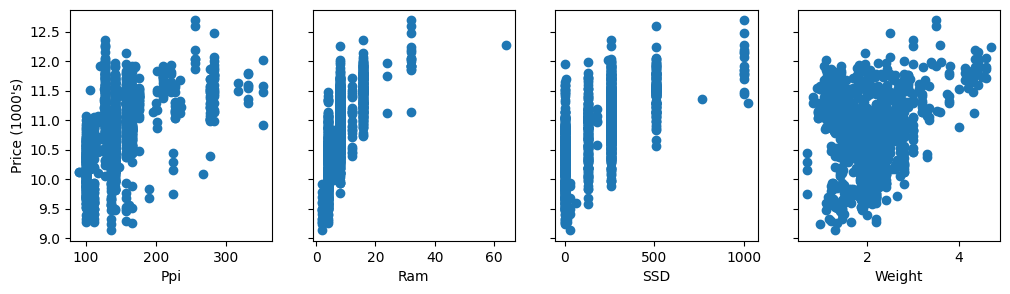

In [3]:
# Plot the features
def plot_features(X, y, features, pred=None):
    fig, ax=plt.subplots(1, len(features), figsize=(12, 3), sharey=True)
    for i in range(len(ax)):
        ax[i].scatter(X[:,i], y)
        if pred is not None:
            ax[i].scatter(X[:,i], pred, color='orange')
        ax[i].set_xlabel(features[i])
    ax[0].set_ylabel("Price (1000's)")
    plt.show()

plot_features(X, y, features)

### Feature Scaling

#### Sklearn

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
print(X_scaled[:5])
print(y[:5])

[[ 1.86512136 -0.08785199 -0.3124181  -1.00317142]
 [-0.44914733 -0.08785199 -0.9988987  -1.04801594]
 [-0.13374099 -0.08785199  0.3740625  -0.27071103]
 [ 1.71484417  1.4817702   1.74702369 -0.31555554]
 [ 1.86512136 -0.08785199  0.3740625  -1.00317142]]
[11.17575455 10.77677732 10.32993107 11.81447594 11.47310097]


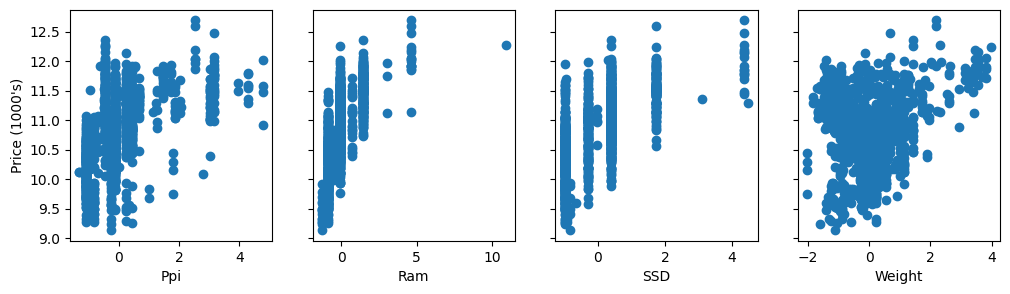

In [6]:
plot_features(X_scaled, y, features)

### Splitting the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1018, 4), (255, 4), (1018,), (255,))

## Training

#### Manual Model

In [17]:
from everdeep.ml.models import LinearRegression

model = LinearRegression(epsilon=1e-7)
w, b, J_hist, p_hist = model.fit(X_train, y_train, alpha=0.01)

Iteration 0: Cost = 2690.887470545677, w = [-51.18  12.04  64.78 -50.39], b = 1.085205036458526
Iteration 1000: Cost = 0.3100868570874369, w = [-0.59  0.35  0.7  -0.34], b = 10.802716600532978
Iteration 2000: Cost = 0.08095346298429644, w = [0.15 0.24 0.2  0.06], b = 10.825190614504002
Final iteration 2109: Cost = 0.08093548784903615, w = [0.16 0.23 0.2  0.07], b = 10.825282254051041


#### Sklearn Model

Normal model

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Stochastic Gradient Descent Model

In [25]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor()
model.fit(X_train, y_train)

SGDRegressor()

### Predicting

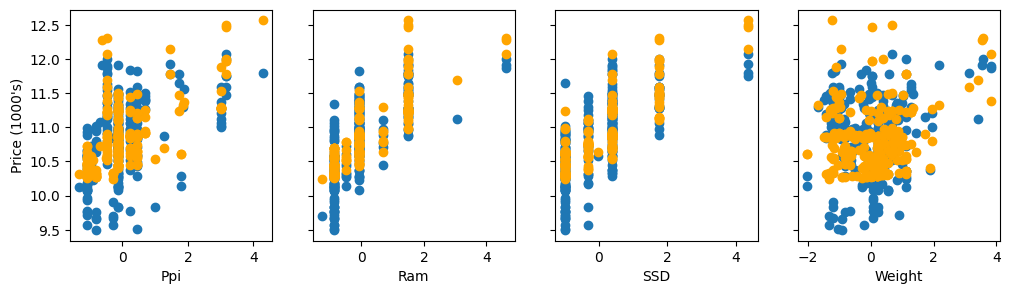

In [27]:
pred = model.predict(X_test)
plot_features(X_test, y_test, features, pred)

In [26]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=2)
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)

# Loss
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

[[12.14 11.92]
 [10.47 10.49]
 [11.49 11.29]
 [10.75 11.3 ]
 [10.38 10.61]
 [10.74 11.06]
 [10.31 10.94]
 [10.45  9.52]
 [10.79 10.78]
 [10.88 10.64]
 [10.85 10.58]
 [11.5  10.88]
 [10.88 11.82]
 [10.77 10.94]
 [10.47 10.6 ]
 [11.32 11.3 ]
 [10.33  9.67]
 [10.9  10.72]
 [10.64 10.9 ]
 [10.7  10.58]
 [10.84 11.29]
 [10.9  10.84]
 [11.21 11.14]
 [10.65 10.45]
 [10.44 10.08]
 [10.89 11.45]
 [12.47 11.76]
 [10.33  9.68]
 [10.88 10.97]
 [10.46 10.28]
 [10.91 11.33]
 [10.9  10.75]
 [10.32 10.84]
 [12.28 11.91]
 [11.11 11.41]
 [10.33  9.57]
 [10.31 10.94]
 [10.38 10.97]
 [10.87 11.22]
 [12.07 11.86]
 [11.28 11.37]
 [10.28  9.96]
 [11.22 11.14]
 [10.29 10.79]
 [10.88 10.87]
 [10.61 10.7 ]
 [11.79 12.  ]
 [10.53 10.23]
 [10.57 10.19]
 [11.38 11.89]
 [11.44 11.57]
 [10.29  9.76]
 [10.48 10.59]
 [10.74 11.06]
 [10.31 10.07]
 [10.43 10.56]
 [10.86 11.35]
 [10.61 10.83]
 [10.27 10.57]
 [10.99 10.98]
 [10.39  9.58]
 [11.14 11.59]
 [10.27 10.19]
 [11.59 11.8 ]
 [11.28 11.2 ]
 [10.87 10.88]
 [11.53 11